In [14]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [26]:
def draw_directed_graph(adj_matrix):
    # Create a directed graph from the adjacency matrix
    G = nx.DiGraph()

    # Add nodes to the graph
    num_nodes = len(adj_matrix)
    G.add_nodes_from(range(num_nodes))

    # Add edges to the graph based on the adjacency matrix
    for i in range(num_nodes):
        for j in range(num_nodes):
            if adj_matrix[i][j] != 0:
                G.add_edge(i, j)

    # Draw the graph
    pos = nx.spring_layout(G)  # Positions for all nodes
    nx.draw(G, pos, node_size=700, node_color='skyblue', font_size=10, arrows=True)


    # Show the graph
    plt.show()

In [2]:
N=100
big=int(N*0.04)
medium=int(N*0.28)
small=int(N*0.68)
K=1000

In [3]:
transitory = np.zeros((3,3))
transitory[0,0]=0.1/N
transitory[0,1]=0.025/N
transitory[0,2]=0.0125/N
transitory[1,0]=2/N
transitory[1,1]=1.5/N
transitory[1,2]=1/N
transitory[2,0]=8/N
transitory[2,1]=5/N
transitory[2,2]=4/N

In [4]:
def simulate(K,transitory,N,big,medium,small,tipe):
    propagation=[]
    impact=[]
    for _ in range(0,K):
        SS = transitory[0,0]+np.random.normal(loc=0,scale=0.001,size=(small,small))
        SM = transitory[0,1]+np.random.normal(loc=0,scale=0.001,size=(small,medium))
        SB = transitory[0,2]+np.random.normal(loc=0,scale=0.001,size=(small,big))
        MS = transitory[1,0]+np.random.normal(loc=0,scale=0.01,size=(medium,small))
        MM = transitory[1,1]+np.random.normal(loc=0,scale=0.01,size=(medium,medium))
        MB = transitory[1,2]+np.random.normal(loc=0,scale=0.01,size=(medium,big))
        BS = transitory[2,0]+np.random.normal(loc=0,scale=0.01,size=(big,small))
        BM = transitory[2,1]+np.random.normal(loc=0,scale=0.01,size=(big,medium))
        BB = transitory[2,2]+np.random.normal(loc=0,scale=0.01,size=(big,big))
        S=np.concatenate((SS,SM,SB),axis=1)
        M=np.concatenate((MS,MM,MB),axis=1)
        B=np.concatenate((BS,BM,BB),axis=1)
        shock = np.concatenate ((S,M,B))
        np.fill_diagonal(shock,0)
        matrix_propag=shock>np.random.random((N,N))
        network = nx.from_numpy_array(matrix_propag)
        propagation.append(nx.number_connected_components(nx.from_numpy_array(matrix_propag)))
        if tipe == 'small':
            tipe=0
        if tipe == 'medium':
            tipe=0+small
        if tipe == 'big':
            tipe=0+small+medium
        impact.append(len(nx.node_connected_component(network,tipe))/N)
    return propagation,impact



In [12]:
prop,impact= simulate(K,transitory,N,big,medium,small,tipe='big')

In [13]:
np.mean(impact)

0.66369

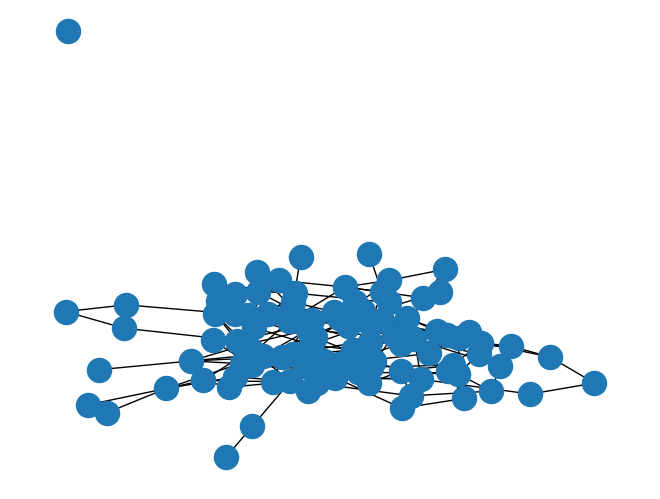

In [149]:
network = nx.from_numpy_array(matrix_propag)
nx.draw_spring(network)

In [9]:
bank_names = [
    "Ally Financial", "American Express", "BMO", "BNP Paribas USA",
    "Bank of America", "Bank of New York Mellon", "Barclays US", "Capital One",
    "Charles Schwab", "Citigroup", "Citizens", "Credit Suisse USA", "DB USA",
    "Discover", "Fifth Third", "First Citizens", "Goldman Sachs",
    "HSBC North America", "Huntington", "JPMorgan Chase", "KeyCorp", "M&T Bank",
    "Morgan Stanley", "Northern Trust", "PNC", "RBC US Group", "Regions Financial",
    "Santander USA", "State Street", "Synchrony", "TD US", "Truist",
    "UBS Americas", "US Bancorp", "Wells Fargo"
]

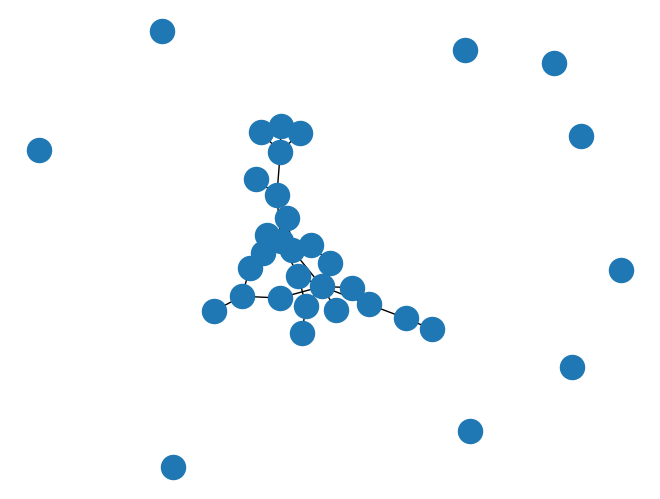

In [8]:
# Load the data
df = pd.read_csv("database.csv")

# Extract the column data as an array
data = df.iloc[:, 0].values  # assuming the data you need is in the first column

# Create a matrix by repeating the column across rows
matrix = np.tile(data, (len(data), 1)).T  # Transpose to get correct orientation

# Set the diagonal elements to 0
np.fill_diagonal(matrix, 0)

# Convert back to DataFrame if needed and then to numpy array for processing
df2 = pd.DataFrame(matrix)
prob_matrix = df2.to_numpy()
network = nx.from_numpy_array(prob_matrix)
nx.draw_spring(network)

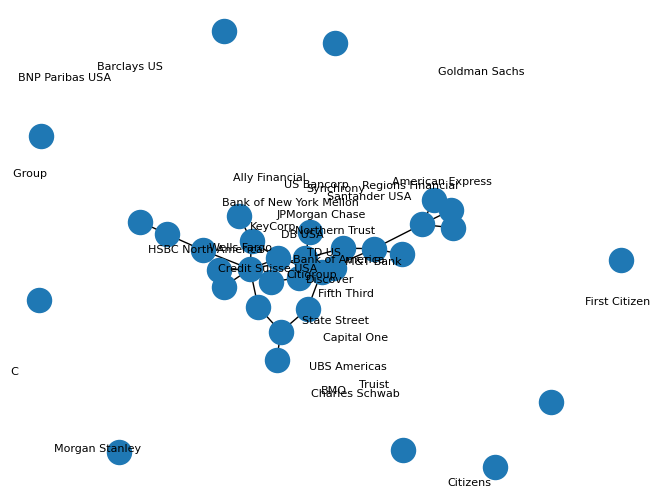

In [11]:
# Draw the network
nx.draw_spring(network, with_labels=False)  # Don't draw node labels here

# Add labels to nodes
node_labels = {i: bank_names[i] for i in range(len(bank_names))}
nx.draw_networkx_labels(network, pos=nx.spring_layout(network), labels=node_labels, font_size=8)

# Display the network
plt.show()

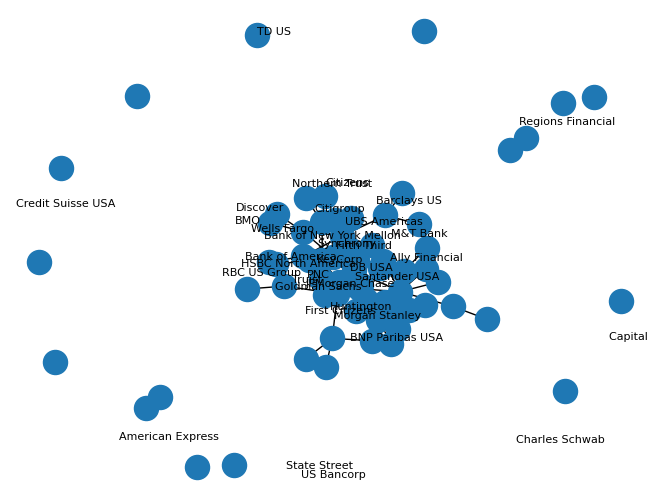

In [12]:
network = nx.from_numpy_array(prob_matrix>np.random.random((35,35)))
nx.draw_spring(network)
# Draw the network
nx.draw_spring(network, with_labels=False)  # Don't draw node labels here

# Add labels to nodes
node_labels = {i: bank_names[i] for i in range(len(bank_names))}
nx.draw_networkx_labels(network, pos=nx.spring_layout(network), labels=node_labels, font_size=8)

# Display the network
plt.show()

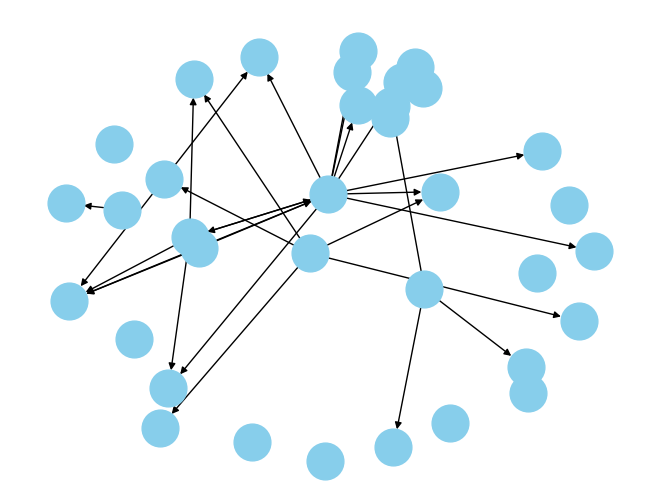

In [27]:
draw_directed_graph(prob_matrix>np.random.random((35,35)))